# Chapter: Support Vector Machines & Kernel Methods


# Topic: Process  Fault Detection via SVDD in metal etch dataset

In [1]:
# read data
import numpy as np

X_train = np.loadtxt('Metal_etch_2DPCA_trainingData.csv', delimiter=',')

In [2]:
# compute bandwidth via modified mean criteria
import scipy.spatial

N = X_train.shape[0]
phi = 1/np.log(N-1)
delta = -0.14818008*np.power(phi,4) + 0.2846623624*np.power(phi,3) - 0.252853808*np.power(phi,2) + 0.159059498*phi - 0.001381145
D2 = np.sum(scipy.spatial.distance.pdist(X_train, 'sqeuclidean'))/(N*(N-1)/2) # pdist computes pairwise distances between observations 
sigma = np.sqrt(D2/np.log((N-1)/delta*delta))
gamma = 1/(2*sigma*sigma)

In [3]:
# fit SVM model
from sklearn.svm import OneClassSVM

model = OneClassSVM(nu=0.01, gamma=0.025).fit(X_train) # nu corresponds to f 

In [5]:
# predict for test data
X_test = np.loadtxt('Metal_etch_2DPCA_testData.csv', delimiter=',')
y_test = model.predict(X_test) # y=-1 for outliers

print('Number of faults identified: ', np.sum(y_test == -1), ' out of ', len(y_test)) 

Number of faults identified:  17  out of  20


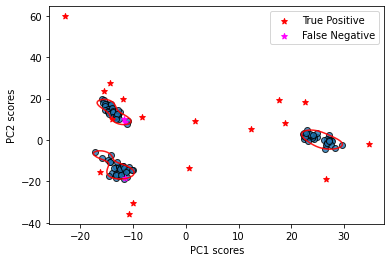

In [7]:
# plot SVDD boundaries and test data
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], edgecolors='k', alpha=0.8)
plt.xlabel('PC1 scores')
plt.ylabel('PC2 scores')

# get axis limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and supporting planes
ax.contour(XX, YY, Z, levels=[0], alpha=0.9, linestyles=['-'], colors=['red'])


# plot test data
plt.scatter(X_test[y_test==-1, 0],X_test[y_test==-1,1], c='red', marker = '*', label='True Positive')
plt.scatter(X_test[y_test==1, 0],X_test[y_test==1,1], c='magenta', marker = '*', label='False Negative')
plt.legend()

plt.show()